In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris


In [4]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Splitting features and target
X = df.drop(columns=['target'])
y = df['target']

In [6]:
# Standardizing the features (LDA is sensitive to scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [7]:
# Applying LDA (Reduce from 4D to 2D)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
X_lda[:5]

array([[ 8.06179978, -0.30042062],
       [ 7.12868772,  0.78666043],
       [ 7.48982797,  0.26538449],
       [ 6.81320057,  0.67063107],
       [ 8.13230933, -0.51446253]])

In [8]:
# Convert to DataFrame for visualization
lda_df = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
lda_df['Target'] = y
lda_df.head()

,LDA1,LDA2,Target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0


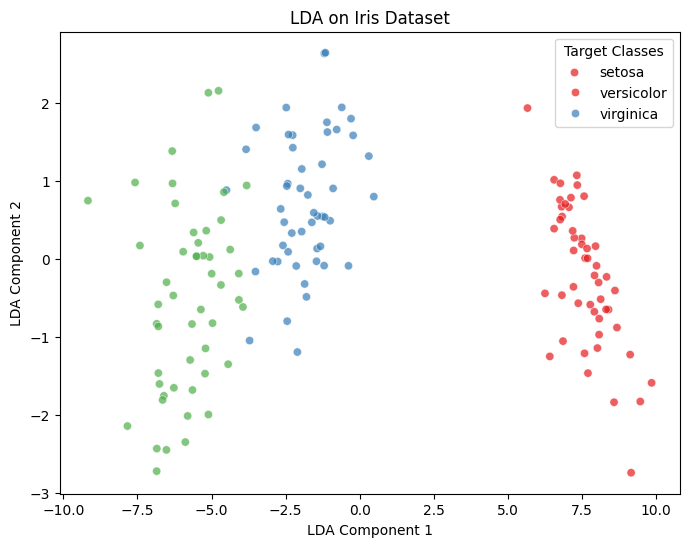

In [9]:
# Plot LDA-transformed data
plt.figure(figsize=(8,6))
sns.scatterplot(data=lda_df, x='LDA1', y='LDA2', hue=lda_df['Target'], palette='Set1', alpha=0.7)
plt.title('LDA on Iris Dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Target Classes', labels=iris.target_names)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Original Dataset 4D

In [16]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [19]:
# Training a Random Forest Classifier on the original 4D data
clf_4d = RandomForestClassifier(random_state=42)
clf_4d.fit(X_train, y_train)
y_pred_4d = clf_4d.predict(X_test)
accuracy_4d = accuracy_score(y_test, y_pred_4d)
print(f"✅ Accuracy with 4D Features: {accuracy_4d:.4f}")

✅ Accuracy with 4D Features: 0.8889


In [20]:
# Explained variance ratio
explained_variance = lda.explained_variance_ratio_
print(f"📊 Explained Variance Ratio: {explained_variance}")
print(f"🔹 LDA1 explains {explained_variance[0] * 100:.2f}% of variance")
print(f"🔹 LDA2 explains {explained_variance[1] * 100:.2f}% of variance")

📊 Explained Variance Ratio: [0.9912126 0.0087874]
🔹 LDA1 explains 99.12% of variance
🔹 LDA2 explains 0.88% of variance


### LDA Dataset using 2D

In [21]:
# Splitting LDA transformed data into train & test
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42, stratify=y)


In [23]:
# 📌 Model Accuracy with 2D LDA Features
clf_2d = RandomForestClassifier(random_state=42)
clf_2d.fit(X_train_lda, y_train)
y_pred_2d = clf_2d.predict(X_test_lda)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"✅ Accuracy with 2D LDA Features: {accuracy_2d:.4f}")

✅ Accuracy with 2D LDA Features: 0.9778


In [24]:
# -------------------------------
# 📌 Comparing Accuracy of 4D vs 2D
# -------------------------------
print("\n🔻 Comparison of Model Performance 🔻")
print(f"🎯 Accuracy with 4D Features: {accuracy_4d:.4f}")
print(f"🎯 Accuracy with 2D LDA Features: {accuracy_2d:.4f}")

if accuracy_2d >= accuracy_4d:
    print("🚀 LDA is effective! Reduced dimensions while maintaining accuracy.")
else:
    print("⚠️ LDA reduced dimensions, but accuracy dropped slightly.")


🔻 Comparison of Model Performance 🔻
🎯 Accuracy with 4D Features: 0.8889
🎯 Accuracy with 2D LDA Features: 0.9778
🚀 LDA is effective! Reduced dimensions while maintaining accuracy.
